Экземпляров: 1797
Размер изображения: 8.0x8.0
11.931736143072893
Iteration 0: mean diff = 11.931736
0.00029188961697382265


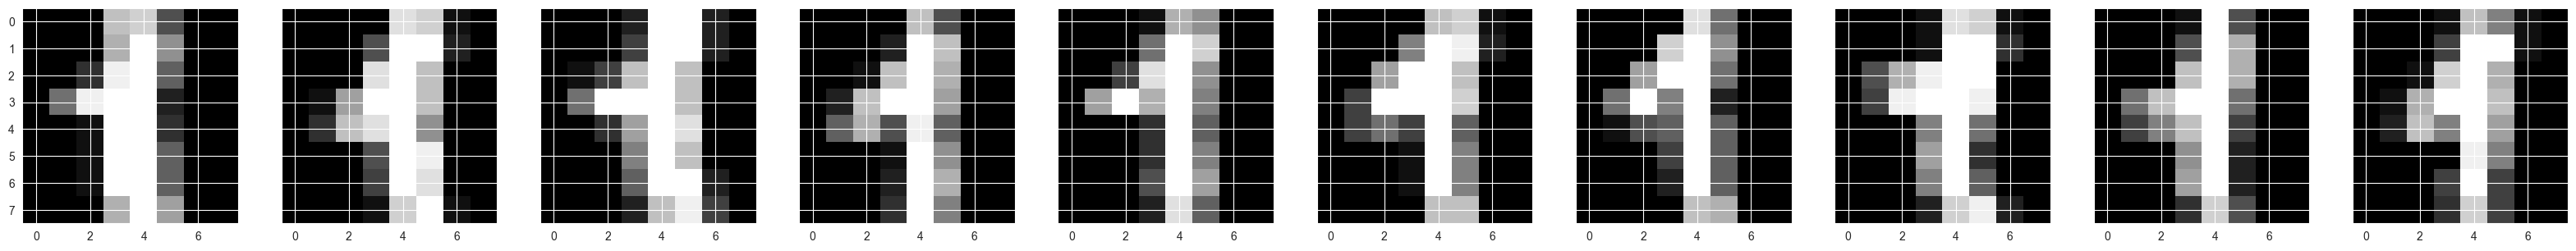

In [2]:
from kMean import *

from sklearn import datasets

X, y = datasets.load_digits(return_X_y=True)

print("Экземпляров: {}\nРазмер изображения: {}x{}".format(X.shape[0], np.sqrt(X.shape[1]), np.sqrt(X.shape[1])))


clusters_mnist, labels_mnist, cent_history = kmeans_fit_predict(X, k=10, low=np.min(X), high=np.max(X))

number = 19# Номер кластера
count = 10 # Кол-во примеров
testX = X[y == number]

testX[0,:].reshape([8,8])
f, axes = plt.subplots(1, count, sharey=True, figsize=(40,6))
for i in range(count):
    axes[i].imshow(testX[i,:].reshape([8,8]), cmap='gray')
